## Creating Trackbar

In [2]:
import numpy as np
import cv2 as cv
def nothing(x):
    print(x)#prints the position of the trackbar
img=np.zeros((512,512,3),np.uint8)
cv.namedWindow('image')
cv.createTrackbar("B",'image',0,255,nothing)#trackbar name,image,start,end,callback function
cv.createTrackbar("G",'image',0,255,nothing)
cv.createTrackbar("R",'image',0,255,nothing)

switch='0 : OFF\n 1 : ON'
cv.createTrackbar(switch,"image",0,1,nothing)
while(1):
    cv.imshow('image',img)
    h=cv.waitKey(1)&0xFF
    if(h==27):
        break
    b=cv.getTrackbarPos('B','image')
    g=cv.getTrackbarPos('G','image')
    r=cv.getTrackbarPos('R','image')
    s=cv.getTrackbarPos(switch,'image')
    if(s==0):
        img[:]=0
    else:
        img[:]=[b,g,r]
cv.destroyAllWindows()

#### More with trackbar

In [5]:
import numpy as np
import cv2 as cv
def nothing(x):
    print(x)
cv.namedWindow('image')
cv.createTrackbar('cp','image',0,255,nothing)
switch='color/gray'
cv.createTrackbar(switch,'image',0,1,nothing)
while(1):
    img=cv.imread("HappyFish.jpg")
    
    pos=cv.getTrackbarPos('cp','image')
    font=cv.FONT_HERSHEY_COMPLEX
    cv.putText(img,str(pos),(50,150),font,2,(0,0,255))
    
    k=cv.waitKey(1)&0xFF
    if(k==27):
        break
    s=cv.getTrackbarPos(switch,'image')
    
    if(s==0):
        pass
    else:
        img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    cv.imshow('image',img)
        
cv.destroyAllWindows()
        
    


## Detecting desired colors

In [7]:
import numpy as np
import cv2 as cv
cv.namedWindow("tracking")
def nothing(x):
    pass
#hue,saturation and value
cv.createTrackbar('LH','tracking',0,255,nothing)
cv.createTrackbar('UH','tracking',255,255,nothing)
cv.createTrackbar('LS','tracking',0,255,nothing)
cv.createTrackbar('US','tracking',255,255,nothing)
cv.createTrackbar('LV','tracking',0,255,nothing)
cv.createTrackbar('UV','tracking',255,255,nothing)
#adjusting trackbar leads to detection of desired colors
while(1):
    frame=cv.imread("E:\\opencv\\opencv-master\\samples\\data\\WindowsLogo.jpg")
    hsv=cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    l_h=cv.getTrackbarPos('LH','tracking')
    u_h=cv.getTrackbarPos('UH','tracking')
    l_s=cv.getTrackbarPos('LS','tracking')
    u_s=cv.getTrackbarPos('US','tracking')
    l_v=cv.getTrackbarPos('LV','tracking')
    u_v=cv.getTrackbarPos('UV','tracking')
    
    l_b=np.array([l_h,l_s,l_v])
    u_b=np.array([u_h,u_s,u_v])
    mask=cv.inRange(hsv,l_b,u_b)
    res=cv.bitwise_and(frame,frame,mask=mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    key=cv.waitKey(1)&0xFF
    if(key==27):
        break
cv.destroyAllWindows()


## Threshold

In [10]:
import cv2 as cv
import numpy as np
img=cv.imread('gradient.png')
_,th1=cv.threshold(img,127,255,cv.THRESH_BINARY)
_,th2=cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
_,th3=cv.threshold(img,127,255,cv.THRESH_TRUNC)
_,th4=cv.threshold(img,127,255,cv.THRESH_TOZERO)

cv.imshow('image1',th1)
cv.imshow('image2',th2)
cv.imshow('image3',th3)
cv.imshow('image4',th4)
cv.waitKey(0)
cv.destroyAllWindows()


## Adaptive Threshold

In [14]:
import cv2 as cv
import numpy as np
img=cv.imread('E:\\opencv\\opencv-master\\samples\\data\\sudoku.png',0)
_,th1=cv.threshold(img,127,255,cv.THRESH_BINARY)
th2=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
cv.imshow('image',img)
cv.imshow('threshold',th1)
cv.imshow('adaptive',th2)
cv.imshow('threshold2',th3)
cv.waitKey(0)
cv.destroyAllWindows()


## Matplotlib in opencv

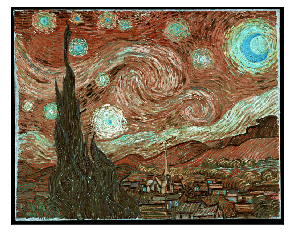

In [18]:
import cv2 as cv
from matplotlib import pyplot as plt
img=cv.imread("starry_night.jpg")
cv.imshow('image',img)
plt.imshow(img)#matplotlib uses RGB format
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()


## Dilation,Erosion and Morphology

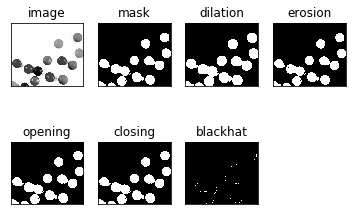

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread("smarties.png",0)
_,mask=cv.threshold(img,220,255,cv.THRESH_BINARY_INV)
#increasing the matrix size give us better results 
kernal=np.ones((2,2),np.uint8)

dilation=cv.dilate(mask,kernal,iterations=4)
erosion=cv.erode(mask,kernal,iterations=1)
opening=cv.morphologyEx(mask,cv.MORPH_OPEN,kernal)#erosion followed by dilation
closing=cv.morphologyEx(mask,cv.MORPH_CLOSE,kernal)
bh=cv.morphologyEx(mask,cv.MORPH_BLACKHAT,kernal)
titles=['image','mask','dilation','erosion','opening','closing','blackhat']
images=[img,mask,dilation,erosion,opening,closing,bh]
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


## Filtering and Blurring

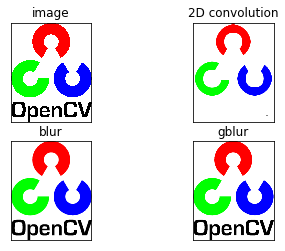

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread("E:\\opencv\\opencv-master\\samples\\data\\opencv-logo.png")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

kernal=np.ones((25,25),np.float32)/25  #1/height*width
dat=cv.filter2D(img,-1,kernal)#image,depth of output image,kernal
blur=cv.blur(img,(5,5))#image,kernel size
gblur=cv.GaussianBlur(img,(5,5),0)#image,kernel size,sigmaX
titles=['image','2D convolution','blur','gblur']
images=[img,dat,blur,gblur]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show()


## Edge detection

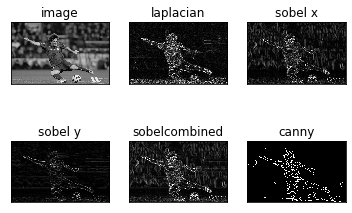

In [23]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
img=cv2.imread("messi5.jpg",0)
lap=cv2.Laplacian(img,cv2.CV_64F,ksize=3)
lap=np.uint8(np.absolute(lap))

sobelx=cv2.Sobel(img,cv2.CV_64F,1,0)#horizontal and vertical derivaties
soby=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
canny=cv2.Canny(img,100,200)
sobelx=np.uint8(np.absolute(sobelx))
soby=np.uint8(np.absolute(soby))
sobelcombined=cv2.bitwise_or(sobelx,soby)
titles=['image','laplacian','sobel x','sobel y','sobelcombined','canny']
images=[img,lap,sobelx,soby,sobelcombined,canny]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show()


## Image pyramids

In [26]:
import cv2
img=cv2.imread("lena.jpg")
layer=img.copy()
gp=[layer]
#gaussian pyramid
for i in range(6):
    layer=cv2.pyrDown(layer)
    gp.append(layer)
    #cv2.imshow(str(i),layer)

layer=gp[5]
cv2.imshow("upper gausian pyramid",layer)
lp=[layer]
#laplacian pyramid
for i in range(5,0,-1):
    gauss_extend=cv2.pyrUp(gp[i])
    laplacian=cv2.subtract(gp[i-1],gauss_extend)
    cv2.imshow(str(i),laplacian)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Combining Images

In [37]:
import cv2 
import numpy as np
apple=cv2.imread("apple.jpg")
orange=cv2.imread("orange.jpg")
print(apple.shape)
print(apple.shape)
apple_orange=np.hstack((apple[:,:256],orange[:,256:]))
cv2.imshow('apple',apple)
cv2.imshow('orange',orange)
cv2.imshow('apple_orange',apple_orange)
cv2.waitKey(0)
cv2.destroyAllWindows()                      

(512, 512, 3)
(512, 512, 3)
